In [45]:
# Dependencies and Setup
%matplotlib inline
from config import gkey
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
from scipy.stats import pearsonr
from numpy import cov
from scipy import stats


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
potholes = pd.read_csv("Resources/311_Service_Requests_-_Pot_Holes_Reported_-_Historical-2016.csv")
crime = pd.read_csv("Resources/Crimes_-_2001_to_present(2016).csv")
parks = pd.read_csv("Resources/CPD_Parks.csv")
sociecn = pd.read_csv("Resources/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv")
sociecn = sociecn[:-1]
#sociecn['Community Area Number'] = sociecn['Community Area Number'].astype(int)
sociecn = sociecn.rename(columns = {'Community Area Number':'Community Area'})

In [50]:
potholes_df=pd.DataFrame(potholes)

#potholes_df['Community Area'] = potholes_df['Community Area'].astype(int)

In [76]:
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10819224,JA119772,12/31/2016 11:59:00 PM,100XX W OHARE ST,810,THEFT,OVER $500,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,False,False,...,41,76,6,1100658.0,1934241.0,2016,02/10/2018 03:50:01 PM,41.976290,-87.905227,"(41.976290414, -87.905227221)"
1,10801137,JA100016,12/31/2016 11:58:00 PM,0000X W 113TH PL,430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,RESIDENCE,False,False,...,34,49,04B,1178014.0,1829709.0,2016,02/10/2018 03:50:01 PM,41.688033,-87.623931,"(41.688033246, -87.623931468)"
2,10802006,JA100012,12/31/2016 11:55:00 PM,0000X E WACKER PL,486,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,False,True,...,42,32,08B,1176964.0,1902140.0,2016,02/10/2018 03:50:01 PM,41.886815,-87.625593,"(41.886814897, -87.625592678)"
3,10801110,JA100027,12/31/2016 11:55:00 PM,030XX N LINCOLN AVE,2250,LIQUOR LAW VIOLATION,LIQUOR LICENSE VIOLATION,RESIDENCE,True,False,...,32,6,22,1166154.0,1920300.0,2016,01/07/2017 03:56:13 PM,41.936885,-87.664770,"(41.936884881, -87.66476981)"
4,10801865,JA100839,12/31/2016 11:54:00 PM,078XX S INDIANA AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,...,6,69,14,1178949.0,1853139.0,2016,02/10/2018 03:50:01 PM,41.752307,-87.619798,"(41.752307019, -87.619797619)"
5,10801291,JA100030,12/31/2016 11:50:00 PM,018XX N DRAKE AVE,460,BATTERY,SIMPLE,RESIDENCE,False,False,...,26,22,08B,1152529.0,1911998.0,2016,02/10/2018 03:50:01 PM,41.914384,-87.715064,"(41.914384153, -87.715063719)"
6,10802735,JA100931,12/31/2016 11:50:00 PM,042XX N KEELER AVE,031A,ROBBERY,ARMED: HANDGUN,ALLEY,False,False,...,39,16,3,1147645.0,1927783.0,2016,02/10/2018 03:50:01 PM,41.957795,-87.732601,"(41.957794792, -87.732600568)"
7,10801171,JA100127,12/31/2016 11:47:00 PM,001XX E WACKER DR,486,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,False,True,...,42,32,08B,1177683.0,1902638.0,2016,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)"
8,10803002,JA100590,12/31/2016 11:45:00 PM,015XX W BELMONT AVE,320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,...,32,6,3,1165426.0,1921325.0,2016,02/10/2018 03:50:01 PM,41.939713,-87.667416,"(41.939713083, -87.667416039)"
9,10801143,JA100035,12/31/2016 11:45:00 PM,048XX W HURON ST,334,ROBBERY,ATTEMPT: ARMED-KNIFE/CUT INSTR,STREET,False,True,...,28,25,3,1144064.0,1904203.0,2016,02/10/2018 03:50:01 PM,41.893157,-87.746359,"(41.893157054, -87.746359097)"


In [51]:
potholes_df.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION
0,12/31/2016,Completed - Dup,01/20/2017,16-08564228,Pothole in Street,NaN,NaN,NaN,2951 W TOUHY AVE,60645.0,1.155431e+06,1.947588e+06,50.0,24.0,2.0,NaN,42.011863,-87.704066,"(42.011863340092, -87.704065711004)"
1,12/31/2016,Completed,01/17/2017,16-08564309,Pothole in Street,Final Outcome,Pothole Patched,10.0,1335 W DEVON AVE,60660.0,1.166086e+06,1.942625e+06,48.0,24.0,77.0,26.0,41.998038,-87.664387,"(41.998037747035, -87.664387098024)"
2,12/31/2016,Completed,01/13/2017,16-08560586,Pothole in Street,Final Outcome,Pothole Patched,27.0,131 N CENTRAL AVE,60644.0,1.139027e+06,1.900420e+06,29.0,15.0,25.0,NaN,41.883187,-87.764813,"(41.883186901358, -87.7648132927)"
3,12/31/2016,Completed,01/17/2017,16-08559206,Pothole in Street,Final Outcome,Pothole Patched,1.0,4920 W FOSTER AVE,60630.0,1.142696e+06,1.934127e+06,39.0,16.0,12.0,NaN,41.975397,-87.751504,"(41.975396932539, -87.751504044466)"
4,12/31/2016,Completed,01/09/2017,16-08558480,Pothole in Street,Final Outcome,Pothole Patched,16.0,6315 N CICERO AVE,60646.0,1.143269e+06,1.941628e+06,39.0,17.0,12.0,NaN,41.996105,-87.748193,"(41.996105475991, -87.74819337237)"


In [48]:
sociecn.head()


,Community Area,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [75]:
potholes_df
potholes_df["COMMUNITY AREA NAME"]=sociecn["COMMUNITY AREA NAME"]
potholes_df


,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION,Community Area Name,COMMUNITY AREA NAME
Community Area,,,,,,,,,,,,,,,,,,,,
0.0,149,149,149,149,149,82,82,83,149,91,149,149,149,149,1,148,148,148,,Rogers Park
1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701,,West Ridge
2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603,,Uptown
3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485,,Lincoln Square
4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632,,North Center
5.0,633,633,633,633,633,431,431,431,633,633,633,633,633,633,256,633,633,633,,Lake View
6.0,990,990,990,990,990,790,790,790,990,990,990,990,990,990,704,990,990,990,,Lincoln Park
7.0,915,915,915,915,915,747,747,749,915,914,915,915,915,915,182,915,915,915,,Near North Side
8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,1309,1310,1310,1310,1310,30,1309,1309,1309,,Edison Park


In [62]:
potholes_df=potholes_df.drop(potholes_df.index[0])
potholes_df=potholes.groupby(['Community Area']).count()

In [63]:
potholes_df

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
Community Area,,,,,,,,,,,,,,,,,,
0.0,149,149,149,149,149,82,82,83,149,91,149,149,149,149,1,148,148,148
1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632
5.0,633,633,633,633,633,431,431,431,633,633,633,633,633,633,256,633,633,633
6.0,990,990,990,990,990,790,790,790,990,990,990,990,990,990,704,990,990,990
7.0,915,915,915,915,915,747,747,749,915,914,915,915,915,915,182,915,915,915
8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,1309,1310,1310,1310,1310,30,1309,1309,1309


In [54]:
potholes_df.reset_index(inplace=True)
potholes_df



,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
0,0.0,149,149,149,149,149,82,82,83,149,91,149,149,149,149,1,148,148,148
1,1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3,3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4,4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632
5,5.0,633,633,633,633,633,431,431,431,633,633,633,633,633,633,256,633,633,633
6,6.0,990,990,990,990,990,790,790,790,990,990,990,990,990,990,704,990,990,990
7,7.0,915,915,915,915,915,747,747,749,915,914,915,915,915,915,182,915,915,915
8,8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,1309,1310,1310,1310,1310,30,1309,1309,1309
9,9.0,532,532,532,532,532,326,326,326,532,532,532,532,532,532,0,532,532,532


In [55]:
potholes_df=potholes_df.drop(potholes_df.index[0])

In [57]:
potholes_df

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
1,1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3,3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4,4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632
5,5.0,633,633,633,633,633,431,431,431,633,633,633,633,633,633,256,633,633,633
6,6.0,990,990,990,990,990,790,790,790,990,990,990,990,990,990,704,990,990,990
7,7.0,915,915,915,915,915,747,747,749,915,914,915,915,915,915,182,915,915,915
8,8.0,1310,1310,1310,1310,1310,1114,1114,1114,1310,1309,1310,1310,1310,1310,30,1309,1309,1309
9,9.0,532,532,532,532,532,326,326,326,532,532,532,532,532,532,0,532,532,532
10,10.0,1495,1495,1495,1495,1495,1005,1005,1010,1495,1495,1492,1492,1495,1495,0,1495,1495,1495


In [22]:
y=potholes_df['CREATION DATE']

In [23]:
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10819224,JA119772,12/31/2016 11:59:00 PM,100XX W OHARE ST,810,THEFT,OVER $500,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,False,False,...,41,76,6,1100658.0,1934241.0,2016,02/10/2018 03:50:01 PM,41.976290,-87.905227,"(41.976290414, -87.905227221)"
1,10801137,JA100016,12/31/2016 11:58:00 PM,0000X W 113TH PL,430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,RESIDENCE,False,False,...,34,49,04B,1178014.0,1829709.0,2016,02/10/2018 03:50:01 PM,41.688033,-87.623931,"(41.688033246, -87.623931468)"
2,10802006,JA100012,12/31/2016 11:55:00 PM,0000X E WACKER PL,486,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,False,True,...,42,32,08B,1176964.0,1902140.0,2016,02/10/2018 03:50:01 PM,41.886815,-87.625593,"(41.886814897, -87.625592678)"
3,10801110,JA100027,12/31/2016 11:55:00 PM,030XX N LINCOLN AVE,2250,LIQUOR LAW VIOLATION,LIQUOR LICENSE VIOLATION,RESIDENCE,True,False,...,32,6,22,1166154.0,1920300.0,2016,01/07/2017 03:56:13 PM,41.936885,-87.664770,"(41.936884881, -87.66476981)"
4,10801865,JA100839,12/31/2016 11:54:00 PM,078XX S INDIANA AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,...,6,69,14,1178949.0,1853139.0,2016,02/10/2018 03:50:01 PM,41.752307,-87.619798,"(41.752307019, -87.619797619)"


In [24]:
crime_df=crime.groupby(['Community Area']).count()

In [25]:
crime_df


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Community Area,,,,,,,,,,,,,,,,,,,,,
1,869,869,869,869,869,869,869,866,869,869,...,869,869,869,860,860,869,869,860,860,860
2,868,868,868,868,868,868,868,866,868,868,...,868,868,868,864,864,868,868,864,864,864
3,847,847,847,847,847,847,847,838,847,847,...,847,847,847,839,839,847,847,839,839,839
4,525,525,525,525,525,525,525,518,525,525,...,525,525,525,521,521,525,525,521,521,521
5,376,376,376,376,376,376,376,371,376,376,...,376,376,376,372,372,376,376,372,372,372
6,1507,1507,1507,1507,1507,1507,1507,1490,1507,1507,...,1507,1507,1507,1494,1494,1507,1507,1494,1494,1494
7,1074,1074,1074,1074,1074,1074,1074,1062,1074,1074,...,1074,1074,1074,1056,1056,1074,1074,1056,1056,1056
8,2692,2692,2692,2692,2692,2692,2692,2676,2692,2692,...,2692,2692,2692,2663,2663,2692,2692,2663,2663,2663
9,76,76,76,76,76,76,76,76,76,76,...,76,76,76,75,75,76,76,75,75,75


In [66]:
x=crime_df['Case Number']

In [67]:
x

Community Area
1      869
2      868
3      847
4      525
5      376
6     1507
7     1074
8     2692
9       76
10     337
11     295
12     147
13     237
14     610
15     800
16     792
17     411
18     171
19    1186
20     337
21     572
22    1439
23    1849
24    2130
25    3978
26    1229
27    1139
28    2426
29    2181
30    1078
      ... 
48     360
49    1749
50     310
51     440
52     311
53     918
54     299
55     158
56     506
57     221
58     602
59     230
60     408
61    1177
62     262
63     547
64     221
65     498
66    1387
67    1564
68    1356
69    1572
70     777
71    1850
72     275
73     721
74     156
75     538
76     457
77     573
Name: Case Number, Length: 77, dtype: int64

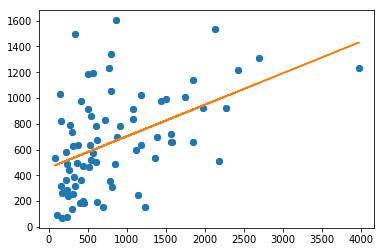

In [83]:
plt.scatter(x,y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x,y,'o', x, line)

In [72]:
covariance=cov(x,y)

In [73]:
covariance

array([[524079.16267943, 128178.77033493],
       [128178.77033493, 142252.54647984]])

In [75]:
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.469
